In [1]:
import itertools
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.linear_model import Ridge
from sklearn.neighbors import NearestNeighbors
import seaborn as sns


standardScaler = StandardScaler()
MMS = MinMaxScaler()


In [ ]:
x_file_path = "dataset/X_train.csv"
y_file_path = "dataset/y_train.csv"
x_file_pathTest = "dataset/X_test.csv"
y_file_pathTest = "dataset/y_test.csv"

# XTest = pd.read_csv(x_file_pathTest)
# YTest = pd.read_csv(y_file_pathTest)
XTest = np.loadtxt(x_file_pathTest, delimiter=",")
YTest = np.loadtxt(y_file_pathTest, delimiter=",")


X_Train = np.loadtxt(x_file_path, delimiter=",")
Y_Train = np.loadtxt(y_file_path, delimiter=",")
XTrainDF = pd.DataFrame(X_Train)
YTrainDF = pd.DataFrame(Y_Train)
XTestDF = pd.DataFrame(XTest)
YTestDF = pd.DataFrame(YTest)

# FifthXTest = XTest.iloc[::5]
# FifthYTest = YTest.iloc[::5]

FifthXTrain = XTrainDF.iloc[::5]
FifthYTrain = YTrainDF.iloc[::5]
X_TrainNorm = MMS.fit_transform(X_Train)
XTestNorm = MMS.fit_transform(XTest)
X_TrainNormStand = standardScaler.fit_transform(X_Train)
XTestNormStand = standardScaler.fit_transform(XTest)

random = 1

In [ ]:
def train(x, y, model_name, params, fixed_params=None, SS=False, MM=False):
    if SS==True:
        x=standardScaler.fit_transform(x)
    if MM==True:
        x=MMS.fit_transform(x)

    model_class = globals()[model_name]
    for key, values in params.items():
        validationScores = []
        trainScores = []
        for value in values:
            model=model_class(**fixed_params)
            model.set_params(**{key: value})
            cv_results = cross_validate(model, x, y, scoring='accuracy', cv=4, return_train_score=True)

            trainScores.append(np.mean(cv_results["train_score"]))
            validationScores.append(np.mean(cv_results["test_score"]))
        x_axis = values
        plt.plot(x_axis, trainScores, marker="^", label="Train")
        plt.plot(x_axis, validationScores, marker="o", label="Validation")
        plt.grid()
        plt.xlabel(key)
        plt.ylabel("Average Accuracy")
        if SS==True:
            plt.title("With Standard Scaler")
        if MM==True:
            plt.title("With MinMax Scaler")
        plt.legend()
        plt.show()

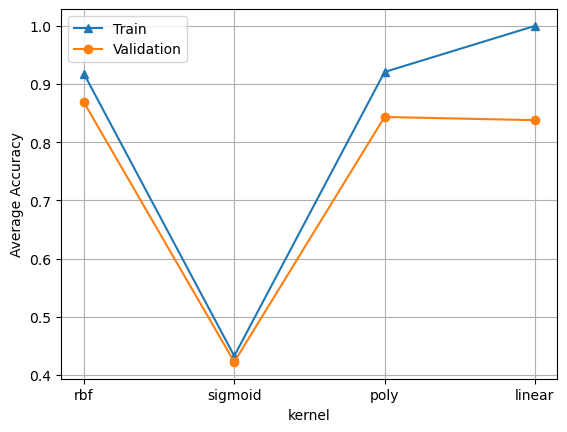

In [ ]:
params={'kernel':['rbf', 'sigmoid', 'poly', 'linear']}
train(FifthXTrain, FifthYTrain[0], 'SVC', params, fixed_params={'random_state':random})

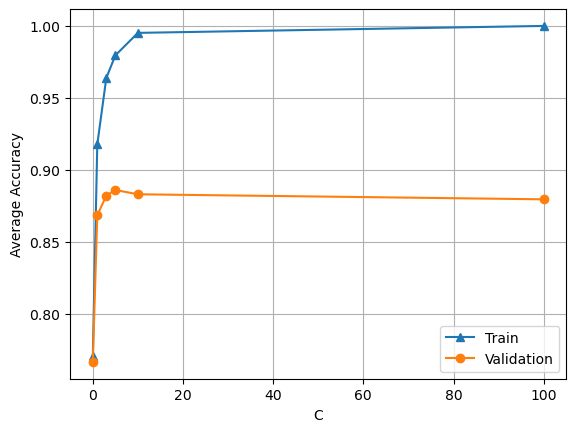

In [ ]:
params={'C':[0.01, 1, 3, 5, 10, 100]}
fixed_params={'kernel': 'rbf', 'random_state':random}
train(FifthXTrain, FifthYTrain.values.ravel(), 'SVC', params, fixed_params)

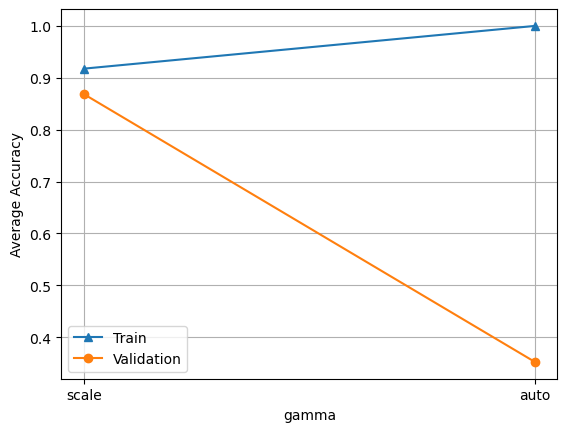

In [ ]:
#default is obviously better
params={'gamma':['scale', 'auto']}
fixed_params={'kernel': 'rbf', 'C':1, 'random_state':random}
train(FifthXTrain, FifthYTrain.values.ravel(), 'SVC', params, fixed_params)

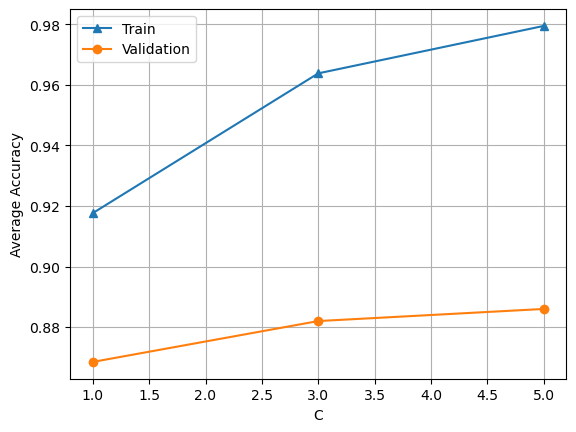

In [ ]:
# Hard to pick between 1 and 5, this is because 5 approaches overfitting,
# However, it has a higher score than the 5
params={'C':[1, 3, 5]}
fixed_params={'kernel':'rbf', 'random_state':random}
train(FifthXTrain, FifthYTrain.values.ravel(), 'SVC', params, fixed_params)

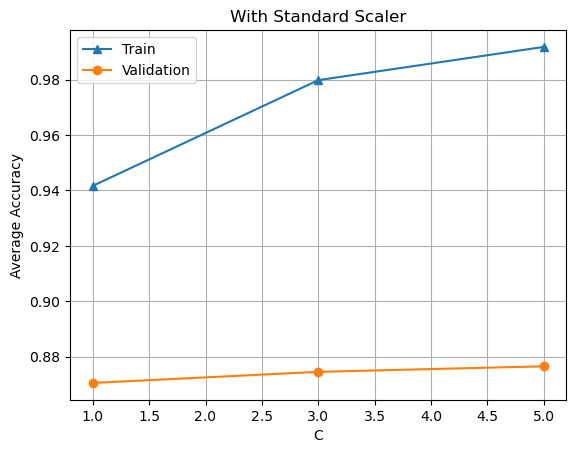

In [ ]:
params={'C':[1, 3, 5]}
fixed_params={'kernel':'rbf', 'random_state':random}
train(FifthXTrain, FifthYTrain.values.ravel(), 'SVC', params, fixed_params, True)

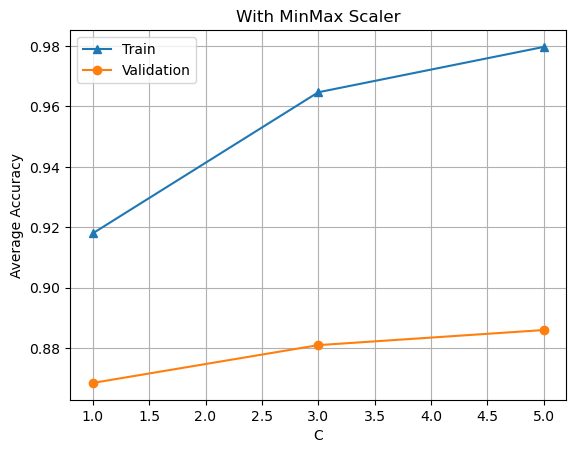

In [ ]:
params={'C':[1, 3, 5]}
fixed_parmas={'kernel':'rbf', 'random_state':random}
train(FifthXTrain, FifthYTrain.values.ravel(), 'SVC', params, fixed_params, False, True)

In [ ]:
# come back if you have time, maybe normalize

finalSVC = SVC(kernel='rbf', C=3, probability=True)
finalSVC.fit(X_TrainNorm, Y_Train)
svc_preds = finalSVC.predict(XTestNorm)
SVCScore = finalSVC.score(XTestNorm, YTest)
print(SVCScore)

0.8966


In [ ]:
#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################
#mlp = MLPClassifier (solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10], alpha=0.01)

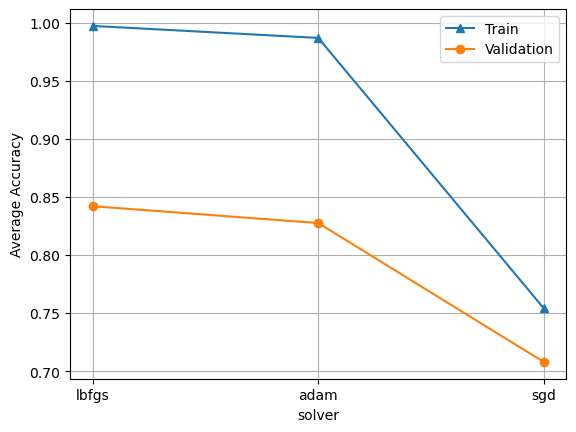

In [ ]:
params={'solver':['lbfgs', 'adam', 'sgd']}
fixed_params={'max_iter':100000000, 'random_state':random}
train(FifthXTrain, FifthYTrain.values.ravel(), 'MLPClassifier', params, fixed_params)

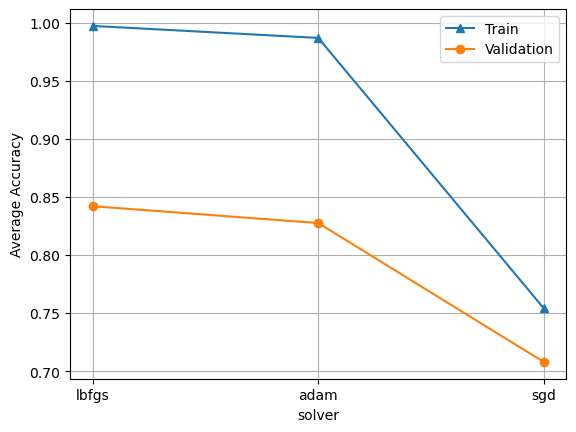

In [ ]:
params={'solver':['lbfgs', 'adam', 'sgd']}
fixed_params={'max_iter':100000, 'random_state':random}
train(FifthXTrain, FifthYTrain.values.ravel(), 'MLPClassifier', params, fixed_params)

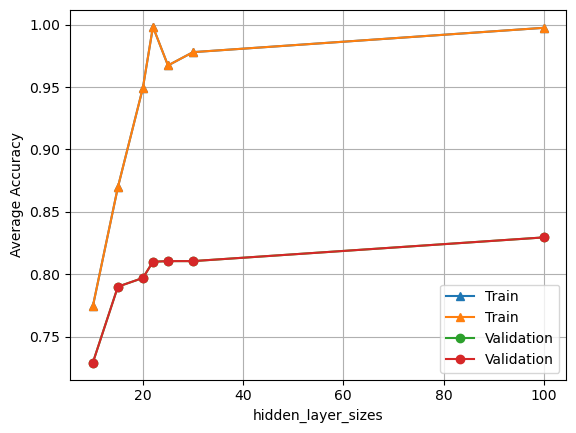

In [ ]:
params={'hidden_layer_sizes':[[10, 10],[15, 15],[20, 20], [22, 22] ,[25, 25], [30, 30], [100, 100]]}
fixed_params={'max_iter': 1000000, 'solver':'adam', 'random_state':random}
train(FifthXTrain, FifthYTrain.values.ravel(), 'MLPClassifier', params, fixed_params)

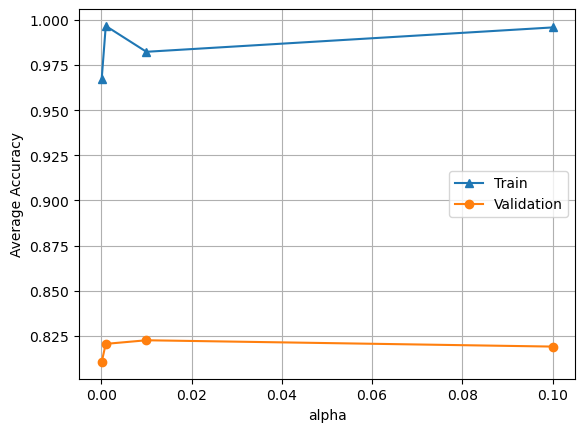

In [ ]:
params={'alpha': [ 0.0001, 0.001, 0.01, 0.1]}
fixed_params={'max_iter': 1000000, 'solver':'adam', 'hidden_layer_sizes':[25, 25], 'random_state':random}
train(FifthXTrain, FifthYTrain.values.ravel(), 'MLPClassifier', params, fixed_params)

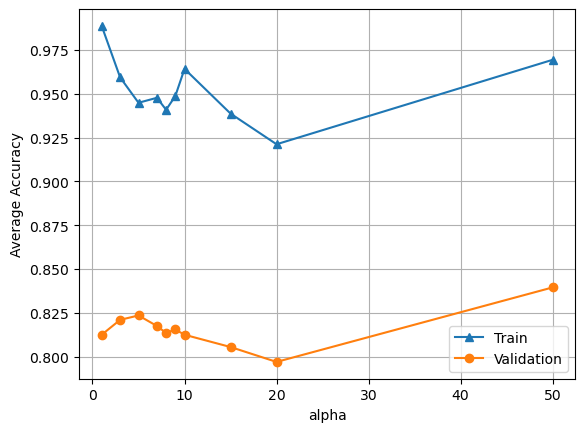

In [ ]:
params={'alpha': [1, 3, 5,7,8,9, 10, 15, 20, 50]}
fixed_params={'max_iter': 1000000, 'solver':'adam', 'hidden_layer_sizes':[25, 25], 'random_state':random}
train(FifthXTrain, FifthYTrain.values.ravel(), 'MLPClassifier', params, fixed_params)

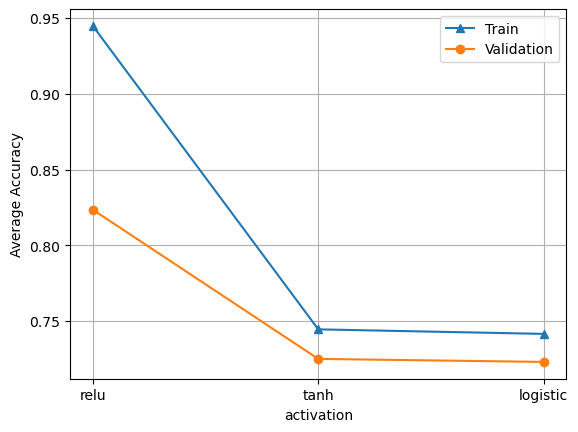

In [ ]:
params={'activation':['relu', 'tanh', 'logistic']}
fixed_params={'max_iter': 1000000, 'solver':'adam', 'hidden_layer_sizes':[25, 25], 'alpha':5, 'random_state':random}
train(FifthXTrain, FifthYTrain.values.ravel(), 'MLPClassifier', params, fixed_params)

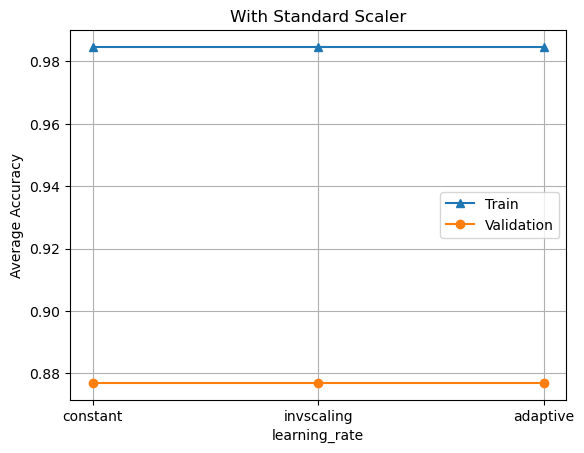

In [ ]:
params={'learning_rate':['constant', 'invscaling', 'adaptive']}
fixed_params={'max_iter': 1000000, 'solver':'adam', 'hidden_layer_sizes':[25, 25], 'alpha':5, 'activation':'relu',
              'random_state':random}
train(FifthXTrain, FifthYTrain.values.ravel(), 'MLPClassifier', params, fixed_params, True)

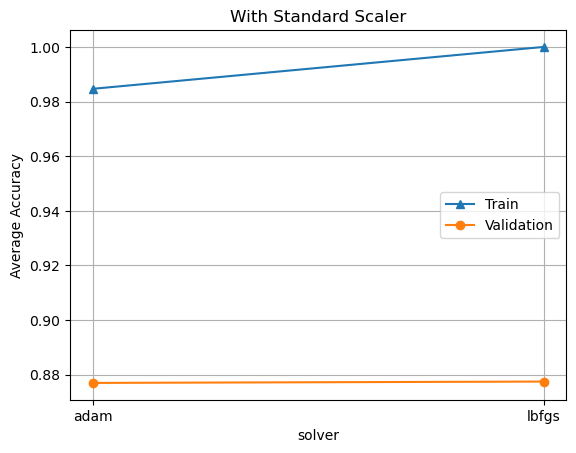

In [ ]:
params={'solver':['adam', 'lbfgs']}
fixed_params={'max_iter': 1000000, 'hidden_layer_sizes':[25, 25], 'alpha':5, 'activation':'relu', 'random_state':random}
train(FifthXTrain, FifthYTrain.values.ravel(), 'MLPClassifier', params, fixed_params, True)

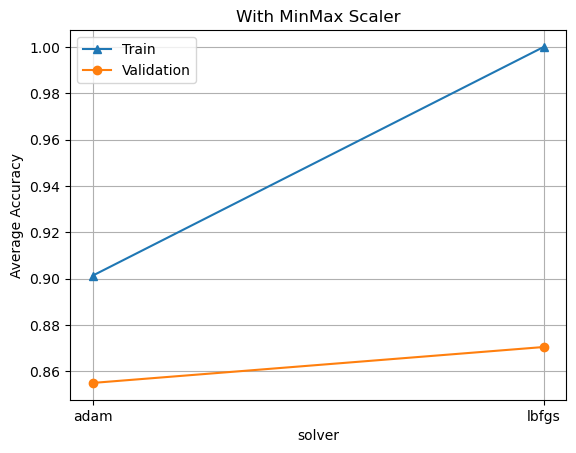

In [ ]:
params={'solver':['adam', 'lbfgs']}
fixed_params={'max_iter': 1000000, 'hidden_layer_sizes':[25, 25], 'alpha':5, 'activation':'relu', 'random_state':random}
train(FifthXTrain, FifthYTrain.values.ravel(), 'MLPClassifier', params, fixed_params, False, True)

In [ ]:
# come back if you have time, maybe normalize at start

finalMLP = MLPClassifier(max_iter=1000000, solver='lbfgs', hidden_layer_sizes=[25, 25], alpha=20, activation='relu',random_state=random )
finalMLP.fit(X_TrainNorm, Y_Train)
# mlp_preds = finalMLP.predict(XTestNormStand)
MLPScore = finalMLP.score(XTestNorm, YTest)
print(MLPScore)

0.872


In [ ]:

finalMLP = MLPClassifier(max_iter=1000000, solver='adam', hidden_layer_sizes=[25, 25], alpha=20, activation='relu',random_state=random )
finalMLP.fit(X_Train, Y_Train)
mlp_preds = finalMLP.predict(XTest)
MLPScore = finalMLP.score(XTest, YTest)
print(MLPScore)

0.8792


In [ ]:
finalMLP = MLPClassifier(max_iter=1000000, solver='lbfgs', hidden_layer_sizes=[25, 25], alpha=20, activation='relu',random_state=random )
finalMLP.fit(X_TrainNormStand, Y_Train)
# mlp_preds = finalMLP.predict(XTestNormStand)
MLPScore = finalMLP.score(XTestNormStand, YTest)
print(MLPScore)

0.879


In [ ]:
###############
###############
###############
###############
###############
###############

###############
###############
###############

###############
###############
###############



In [ ]:
finalMLP = MLPClassifier(max_iter=10000, solver='adam', hidden_layer_sizes=[25, 25], alpha=5, activation='relu',random_state=random )
finalMLP.fit(X_Train, Y_Train)
mlp_preds = finalMLP.predict(XTest)
MLPScore = finalMLP.score(XTest, YTest)
print(MLPScore)

0.8792


In [ ]:
finalSVC = SVC(kernel='rbf', C=3, probability=True)
finalSVC.fit(X_TrainNorm, Y_Train)
svc_preds = finalSVC.predict(XTestNorm)
SVCScore = finalSVC.score(XTestNorm, YTest)
print(SVCScore)


0.8966


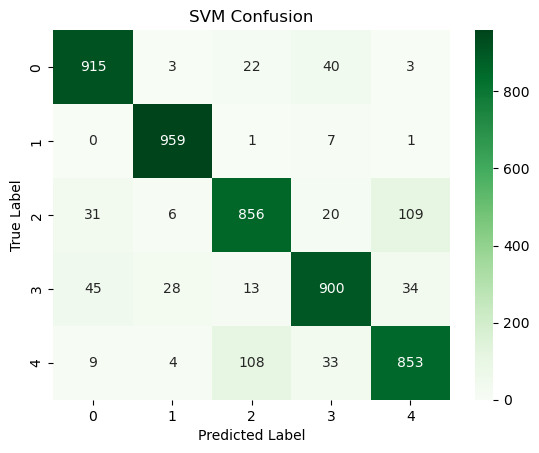

In [ ]:
cm = confusion_matrix(svc_preds, YTest)
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion')
plt.show()

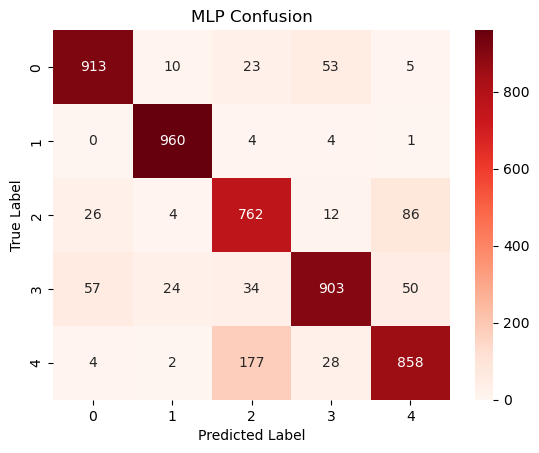

In [ ]:
cm = confusion_matrix(mlp_preds, YTest)
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('MLP Confusion')
plt.show()

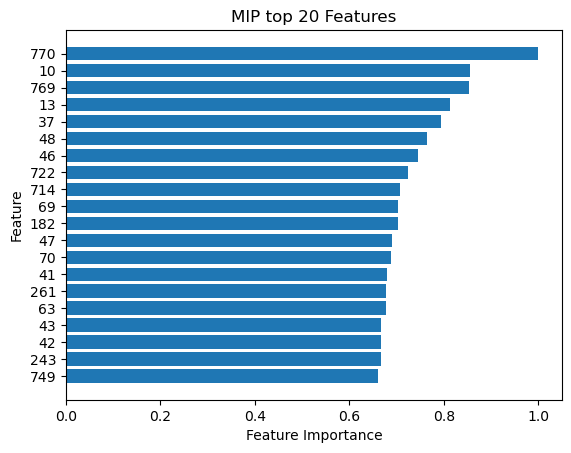

In [ ]:
importances = np.abs(finalMLP.coefs_[0]).sum(axis=1)

importances /= importances.max()
sorted_idx = np.argsort(importances)[-20:]

plt.barh(range(len(sorted_idx)), importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), XTrainDF.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('MlP top 20 Features')
plt.show()

In [ ]:

# perm_importance = permutation_importance(finalSVC, XTest, YTest)
# importances = perm_importance.importances_mean
# sorted_idx = np.argsort(importances)[::-20]

# # importances = np.abs(finalSVC.coefs_).sum(axis=1)
# #
# # importances /= importances.max()
# # sorted_idx = np.argsort(importances)[-20:]

# plt.barh(range(len(sorted_idx)), importances[sorted_idx])
# plt.yticks(range(len(sorted_idx)), XTrainDF.columns[sorted_idx])
# # plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.title('SVM top 20 Features')
# plt.show()

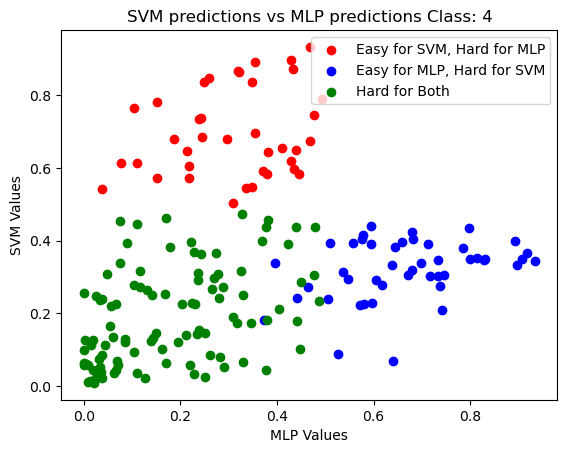

0
1
2
3
4
5


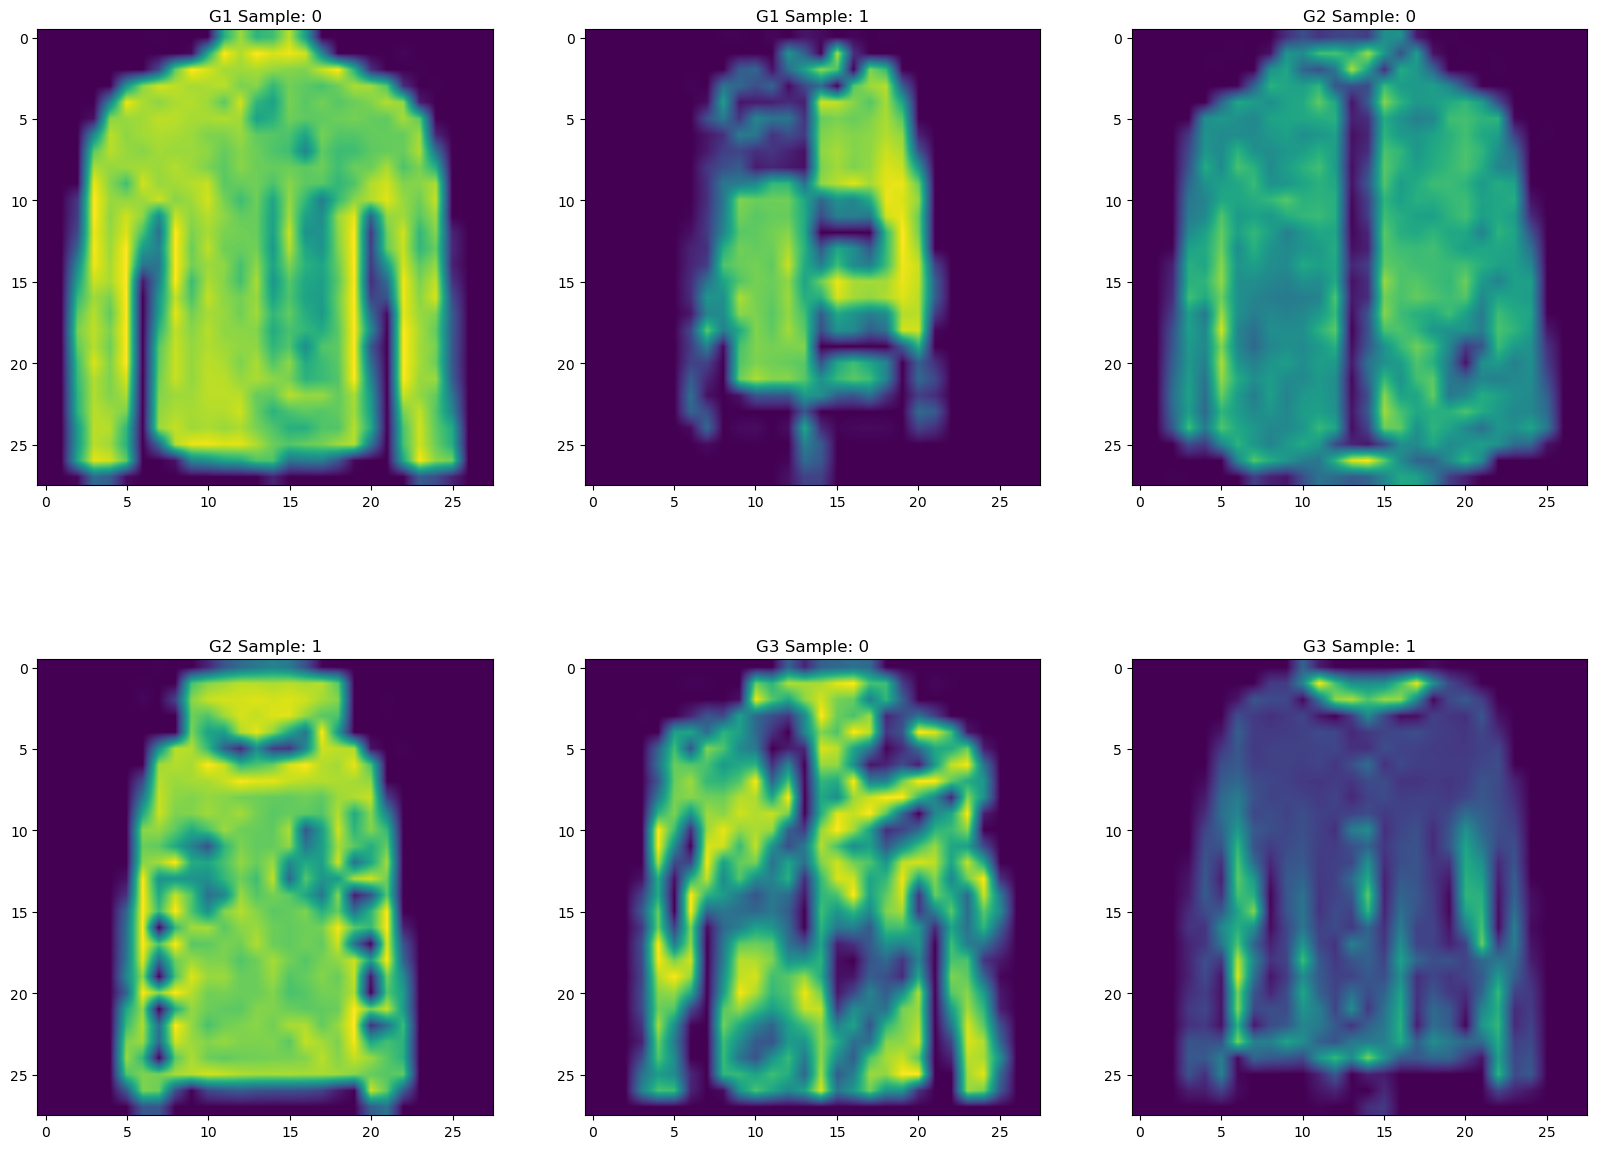

In [ ]:
classnum = 4
mlpdf = pd.DataFrame(mlp_preds)
svcdf = pd.DataFrame(svc_preds)
# class0df = YTestDF[YTestDF.iloc[:,0].isin([classnum])]
# # mlpclassdf = mlpdf[mlpdf.iloc[:,0].isin([classnum])]
# # svcClassDF = svcdf[svcdf.iloc[:,0].isin([classnum])]
easy_svm = np.where((YTestDF[0] == svc_preds) & (YTestDF[0] != mlp_preds))[0]
hard_svm = np.where((YTestDF[0] != svc_preds) & (YTestDF[0] == mlp_preds))[0]
hard_both = np.where((YTestDF[0] != svc_preds) & (YTestDF[0] != mlp_preds))[0]
classZeroEasySVM = []
classZeroHardSVM = []
classZeroHardBoth = []
for point in easy_svm:
    if(YTest[point] == classnum):
        classZeroEasySVM.append(point)
# classZeroEasySVM = np.where(easy_svm < 1000)
for point in hard_svm:
    if(YTest[point] == classnum):
        classZeroHardSVM.append(point)
for point in hard_both:
    if(YTest[point] == classnum):
        classZeroHardBoth.append(point)
svm_probs = finalSVC.predict_proba(XTestNorm)
mlp_probs = finalMLP.predict_proba(XTest)



hardmlp,easysvm=[],[]
for j in (classZeroEasySVM):
    probmlp = mlp_probs[j][int(YTestDF[0][j])]
    svmProbs = svm_probs[j][int(YTestDF[0][j])]
    if(probmlp < .5 and svmProbs > .5):
        hardmlp.append(probmlp)
        easysvm.append(svmProbs)


hardsvm,easymlp=[],[]
for j in (classZeroHardSVM):
    probmlp = mlp_probs[j][int(YTestDF[0][j])]
    svmProbs = svm_probs[j][int(YTestDF[0][j])]
    hardsvm.append(svmProbs)
    easymlp.append(probmlp)


hardsvm1,hardmlp1=[],[]
for j in (classZeroHardBoth):
    probmlp = mlp_probs[j][int(YTestDF[0][j])]
    svmProbs = svm_probs[j][int(YTestDF[0][j])]
    if(probmlp < .5 and svmProbs < .5):
        hardsvm1.append(svmProbs)
        hardmlp1.append(probmlp)

plt.scatter(hardmlp, easysvm, color='red', label='Easy for SVM, Hard for MLP')
plt.scatter(easymlp, hardsvm, color='blue', label='Easy for MLP, Hard for SVM')
plt.scatter(hardmlp1, hardsvm1, color='green', label='Hard for Both')
plt.xlabel('MLP Values')
plt.ylabel('SVM Values')
plt.legend(loc='best')
plt.title('SVM predictions vs MLP predictions Class: '+ str(classnum))
plt.show()


G1S1 = classZeroEasySVM[0]
G1S2 = classZeroEasySVM[1]
G2S1 = classZeroHardSVM[0]
G2S2 = classZeroHardSVM[1]
G3S1 = classZeroHardBoth[0]
G3S2 = classZeroHardBoth[1]

missedsamples = []
missedsamples.append(XTest[G1S1])
missedsamples.append(XTest[G1S2])
missedsamples.append(XTest[G2S1])
missedsamples.append(XTest[G2S2])
missedsamples.append(XTest[G3S1])
missedsamples.append(XTest[G3S2])

rows = 2
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(20, 15))

for i in range(6):
    print(i)
    row = i // cols
    col = i % cols
    axs[row][col].imshow(missedsamples[i].reshape(28, 28), cmap='viridis', interpolation='bilinear')
    if(i <= 1):
        axs[row][col].set_title('G1 Sample: {}'.format(i))
    elif(i <= 3):
        axs[row][col].set_title('G2 Sample: {}'.format(i-2))
    elif(i <= 5):
        axs[row][col].set_title('G3 Sample: {}'.format(i-4))
plt.show()

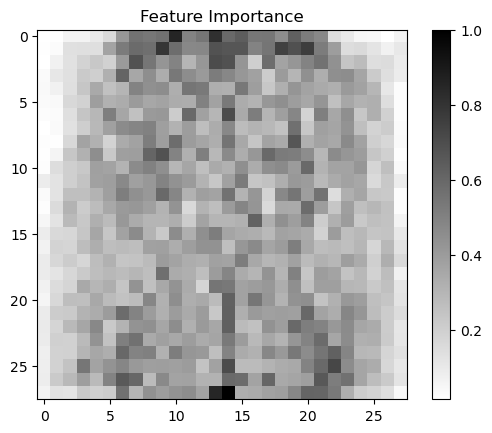

In [ ]:

plt.imshow(importances.reshape(28,28), cmap='gray_r', interpolation='nearest')
plt.title('Feature Importance')
plt.colorbar()
plt.show()